In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier,RandomForestRegressor
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score,mean_squared_error, mean_absolute_error, r2_score

In [2]:
df=pd.read_csv("matche_stats.csv")
df.head()

,Date,Time,Team,Round,Day,Result,GF,GA,Opponent,xG,...,Formation,Opp Formation,Referee,Sh,SoT,Dist,FK,PK,PKatt,Season
0,2024-08-17,12:30,Liverpool,Matchweek 1,Sat,W,2.0,0.0,Ipswich Town,2.6,...,4-2-3-1,4-2-3-1,Tim Robinson,18,5,14.8,0.0,0,0,2025
1,2024-08-25,16:30,Liverpool,Matchweek 2,Sun,W,2.0,0.0,Brentford,2.5,...,4-2-3-1,4-4-2,Stuart Attwell,19,8,13.6,1.0,0,0,2025
2,2024-09-01,16:00,Liverpool,Matchweek 3,Sun,W,3.0,0.0,Manchester Utd,1.8,...,4-2-3-1,4-2-3-1,Anthony Taylor,11,3,13.4,0.0,0,0,2025
3,2024-09-14,15:00,Liverpool,Matchweek 4,Sat,L,0.0,1.0,Nott'ham Forest,0.9,...,4-2-3-1,4-2-3-1,Michael Oliver,14,5,14.9,0.0,0,0,2025
4,2024-09-21,15:00,Liverpool,Matchweek 5,Sat,W,3.0,0.0,Bournemouth,2.0,...,4-2-3-1,4-2-3-1,Tony Harrington,19,12,16.6,0.0,0,0,2025


In [3]:
df.isnull().sum()/df.shape[0]*100

Date             0.0
Time             0.0
Team             0.0
Round            0.0
Day              0.0
Result           0.0
GF               0.0
GA               0.0
Opponent         0.0
xG               0.0
xGA              0.0
Poss             0.0
Captain          0.0
Formation        0.0
Opp Formation    0.0
Referee          0.0
Sh               0.0
SoT              0.0
Dist             0.0
FK               0.0
PK               0.0
PKatt            0.0
Season           0.0
dtype: float64

In [4]:
df["Team"].value_counts()

Team
Liverpool                   18
Arsenal                     18
Chelsea                     18
Aston Villa                 18
Fulham                      18
Newcastle United            18
Manchester City             18
West Ham United             12
Southampton                 12
Crystal Palace              12
Leicester City              12
Everton                     12
Ipswich Town                12
Bournemouth                 12
Manchester United           12
Brentford                   12
Nottingham Forest           12
Brighton and Hove Albion    12
Tottenham Hotspur           12
Wolverhampton Wanderers     12
Name: count, dtype: int64

In [5]:
df["Round"].value_counts()

Round
Matchweek 1    47
Matchweek 2    47
Matchweek 3    47
Matchweek 4    47
Matchweek 5    47
Matchweek 6    47
Name: count, dtype: int64

In [6]:
df[df["Team"]=="Liverpool"]

,Date,Time,Team,Round,Day,Result,GF,GA,Opponent,xG,...,Formation,Opp Formation,Referee,Sh,SoT,Dist,FK,PK,PKatt,Season
0,2024-08-17,12:30,Liverpool,Matchweek 1,Sat,W,2.0,0.0,Ipswich Town,2.6,...,4-2-3-1,4-2-3-1,Tim Robinson,18,5,14.8,0.0,0,0,2025
1,2024-08-25,16:30,Liverpool,Matchweek 2,Sun,W,2.0,0.0,Brentford,2.5,...,4-2-3-1,4-4-2,Stuart Attwell,19,8,13.6,1.0,0,0,2025
2,2024-09-01,16:00,Liverpool,Matchweek 3,Sun,W,3.0,0.0,Manchester Utd,1.8,...,4-2-3-1,4-2-3-1,Anthony Taylor,11,3,13.4,0.0,0,0,2025
3,2024-09-14,15:00,Liverpool,Matchweek 4,Sat,L,0.0,1.0,Nott'ham Forest,0.9,...,4-2-3-1,4-2-3-1,Michael Oliver,14,5,14.9,0.0,0,0,2025
4,2024-09-21,15:00,Liverpool,Matchweek 5,Sat,W,3.0,0.0,Bournemouth,2.0,...,4-2-3-1,4-2-3-1,Tony Harrington,19,12,16.6,0.0,0,0,2025
5,2024-09-28,17:30,Liverpool,Matchweek 6,Sat,W,2.0,1.0,Wolves,2.5,...,4-2-3-1,4-1-4-1,Anthony Taylor,9,5,18.0,1.0,1,1,2025
42,2024-08-17,12:30,Liverpool,Matchweek 1,Sat,W,2.0,0.0,Ipswich Town,2.6,...,4-2-3-1,4-2-3-1,Tim Robinson,18,5,14.8,0.0,0,0,2025
43,2024-08-25,16:30,Liverpool,Matchweek 2,Sun,W,2.0,0.0,Brentford,2.5,...,4-2-3-1,4-4-2,Stuart Attwell,19,8,13.6,1.0,0,0,2025
44,2024-09-01,16:00,Liverpool,Matchweek 3,Sun,W,3.0,0.0,Manchester Utd,1.8,...,4-2-3-1,4-2-3-1,Anthony Taylor,11,3,13.4,0.0,0,0,2025
45,2024-09-14,15:00,Liverpool,Matchweek 4,Sat,L,0.0,1.0,Nott'ham Forest,0.9,...,4-2-3-1,4-2-3-1,Michael Oliver,14,5,14.9,0.0,0,0,2025


In [7]:
df.dtypes

Date              object
Time              object
Team              object
Round             object
Day               object
Result            object
GF               float64
GA               float64
Opponent          object
xG               float64
xGA              float64
Poss             float64
Captain           object
Formation         object
Opp Formation     object
Referee           object
Sh                 int64
SoT                int64
Dist             float64
FK               float64
PK                 int64
PKatt              int64
Season             int64
dtype: object

In [8]:
df["Date"]=pd.to_datetime(df["Date"])

In [9]:
df.dtypes

Date             datetime64[ns]
Time                     object
Team                     object
Round                    object
Day                      object
Result                   object
GF                      float64
GA                      float64
Opponent                 object
xG                      float64
xGA                     float64
Poss                    float64
Captain                  object
Formation                object
Opp Formation            object
Referee                  object
Sh                        int64
SoT                       int64
Dist                    float64
FK                      float64
PK                        int64
PKatt                     int64
Season                    int64
dtype: object

In [10]:
df.drop_duplicates()

,Date,Time,Team,Round,Day,Result,GF,GA,Opponent,xG,...,Formation,Opp Formation,Referee,Sh,SoT,Dist,FK,PK,PKatt,Season
0,2024-08-17,12:30,Liverpool,Matchweek 1,Sat,W,2.0,0.0,Ipswich Town,2.6,...,4-2-3-1,4-2-3-1,Tim Robinson,18,5,14.8,0.0,0,0,2025
1,2024-08-25,16:30,Liverpool,Matchweek 2,Sun,W,2.0,0.0,Brentford,2.5,...,4-2-3-1,4-4-2,Stuart Attwell,19,8,13.6,1.0,0,0,2025
2,2024-09-01,16:00,Liverpool,Matchweek 3,Sun,W,3.0,0.0,Manchester Utd,1.8,...,4-2-3-1,4-2-3-1,Anthony Taylor,11,3,13.4,0.0,0,0,2025
3,2024-09-14,15:00,Liverpool,Matchweek 4,Sat,L,0.0,1.0,Nott'ham Forest,0.9,...,4-2-3-1,4-2-3-1,Michael Oliver,14,5,14.9,0.0,0,0,2025
4,2024-09-21,15:00,Liverpool,Matchweek 5,Sat,W,3.0,0.0,Bournemouth,2.0,...,4-2-3-1,4-2-3-1,Tony Harrington,19,12,16.6,0.0,0,0,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2024-08-25,14:00,Wolverhampton Wanderers,Matchweek 2,Sun,L,2.0,6.0,Chelsea,1.9,...,4-2-3-1,4-2-3-1,Darren England,12,4,19.1,1.0,0,0,2024
278,2024-08-31,15:00,Wolverhampton Wanderers,Matchweek 3,Sat,D,1.0,1.0,Nott'ham Forest,0.7,...,4-4-1-1,4-2-3-1,Simon Hooper,11,2,20.7,0.0,0,0,2024
279,2024-09-15,16:30,Wolverhampton Wanderers,Matchweek 4,Sun,L,1.0,2.0,Newcastle Utd,1.2,...,4-4-1-1,4-3-3,Chris Kavanagh,12,5,15.2,0.0,0,0,2024
280,2024-09-21,15:00,Wolverhampton Wanderers,Matchweek 5,Sat,L,1.0,3.0,Aston Villa,0.5,...,4-1-4-1,4-2-3-1,Tim Robinson,10,4,14.9,0.0,0,0,2024


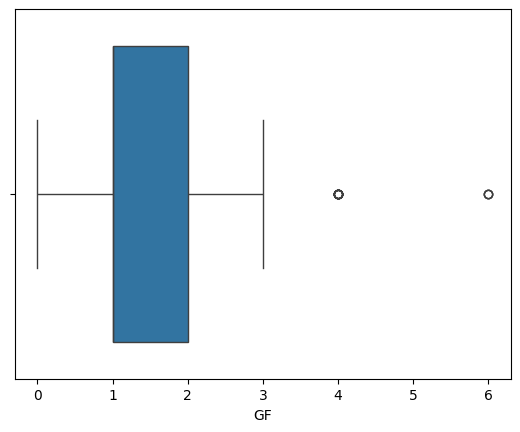

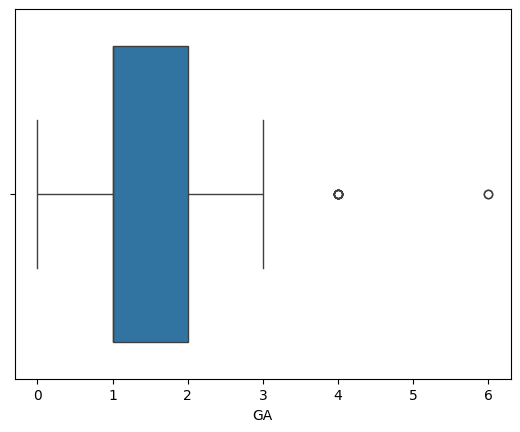

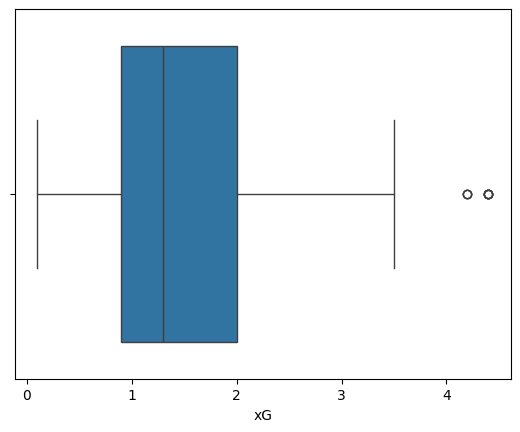

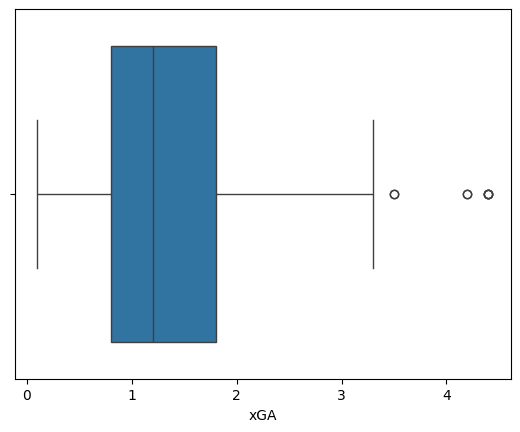

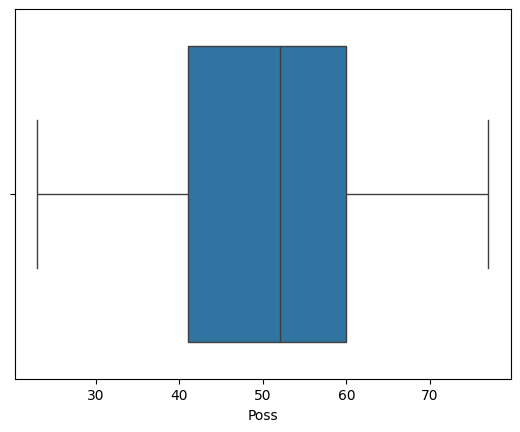

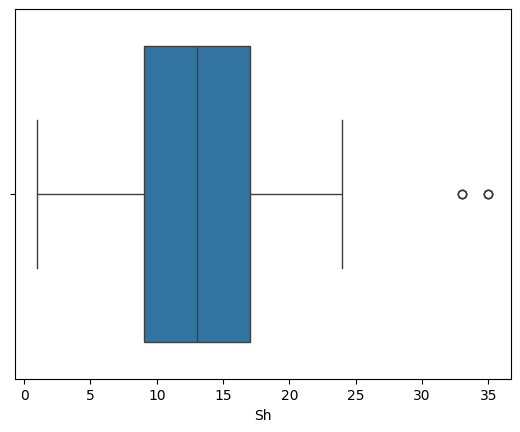

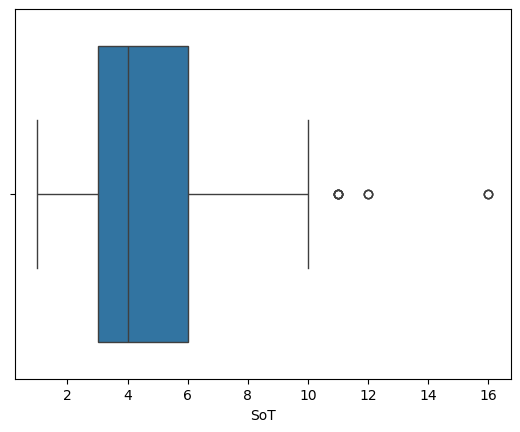

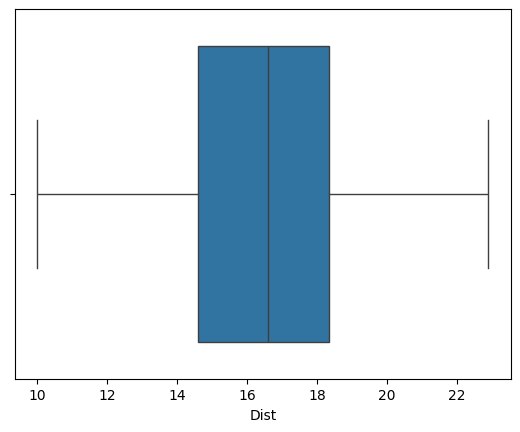

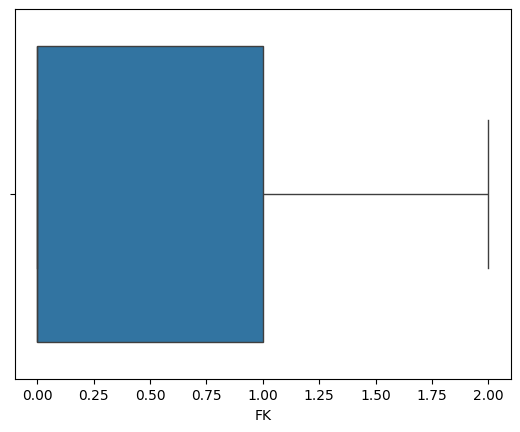

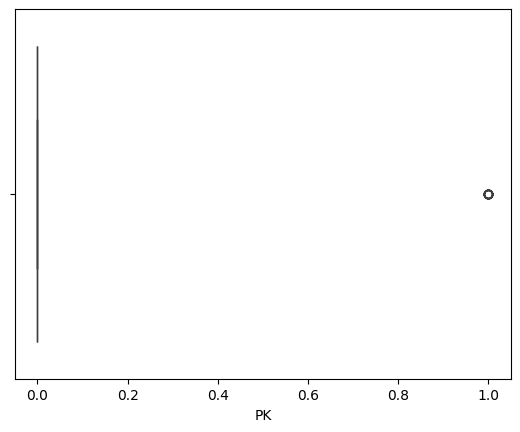

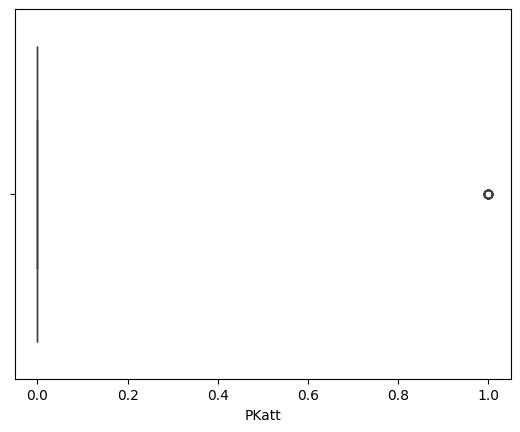

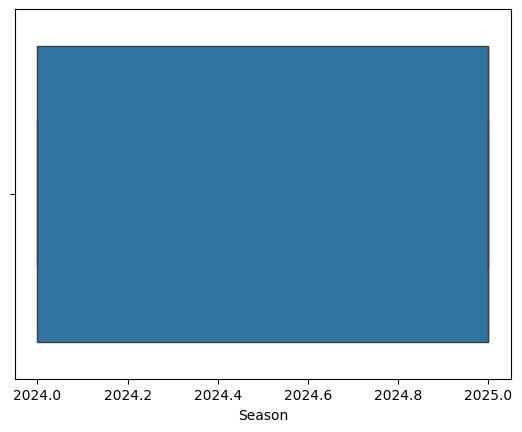

In [11]:
for i in df.select_dtypes(include="number" or "numeric").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [12]:
def wisker(col):
    q1,q3=np.percentile(col,(25,75))
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [13]:
df.columns

Index(['Date', 'Time', 'Team', 'Round', 'Day', 'Result', 'GF', 'GA',
       'Opponent', 'xG', 'xGA', 'Poss', 'Captain', 'Formation',
       'Opp Formation', 'Referee', 'Sh', 'SoT', 'Dist', 'FK', 'PK', 'PKatt',
       'Season'],
      dtype='object')

In [14]:
for i in ['GF','GA','xG','xGA','Sh','SoT','PK','PKatt']:
    lw,uw=wisker(df[i])
    df[i]=np.where(df[i] < lw,lw,df[i])
    df[i]=np.where(df[i] > uw,uw,df[i])

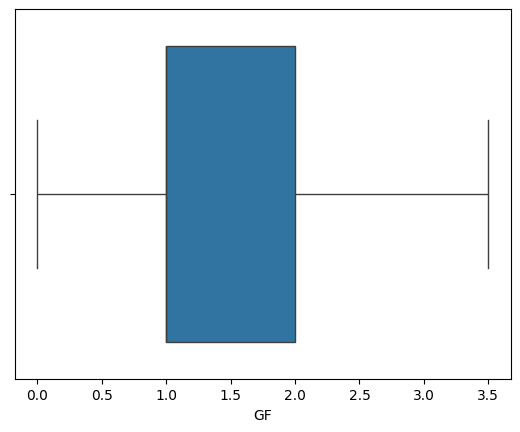

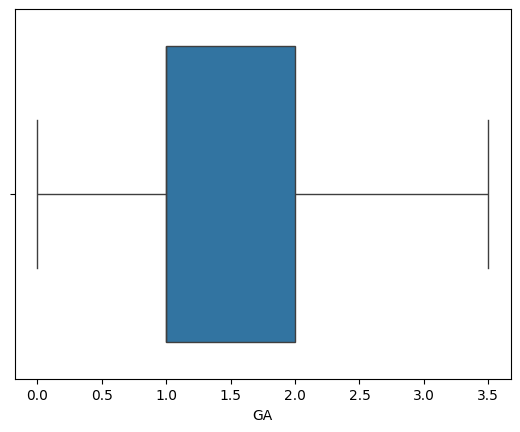

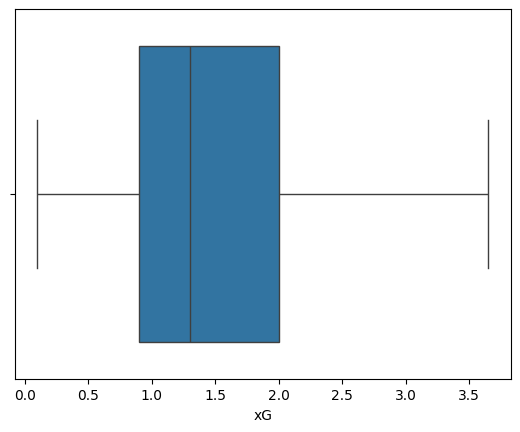

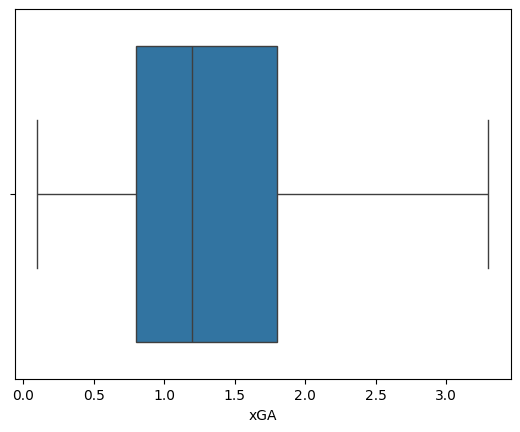

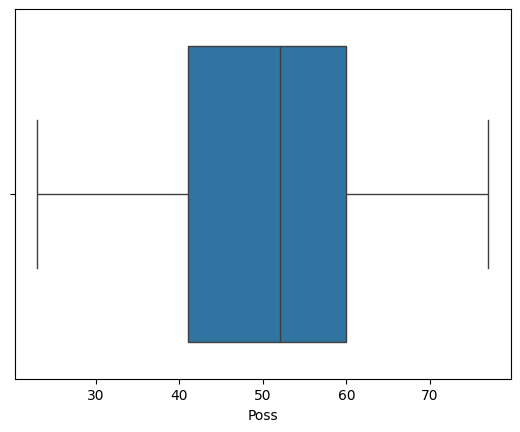

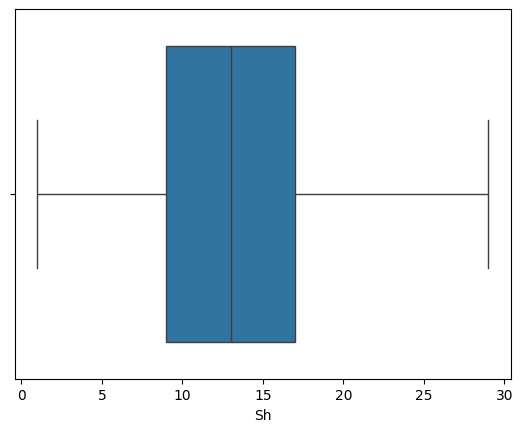

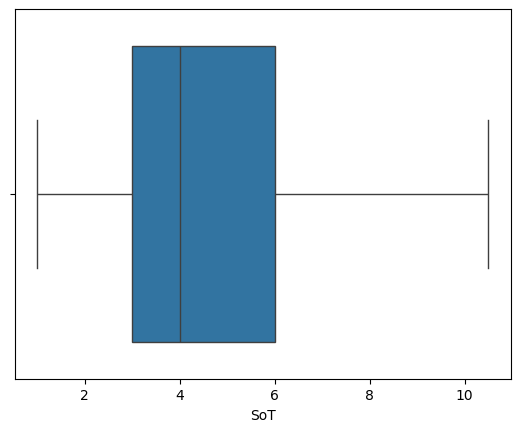

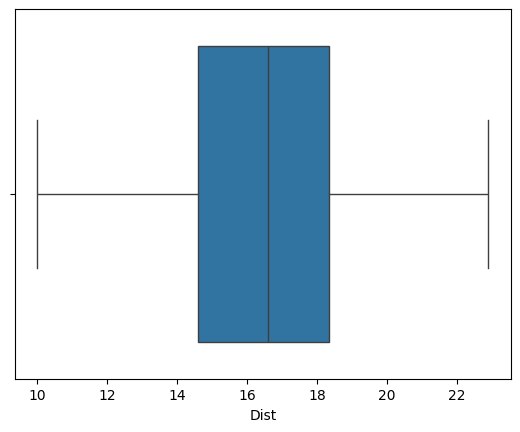

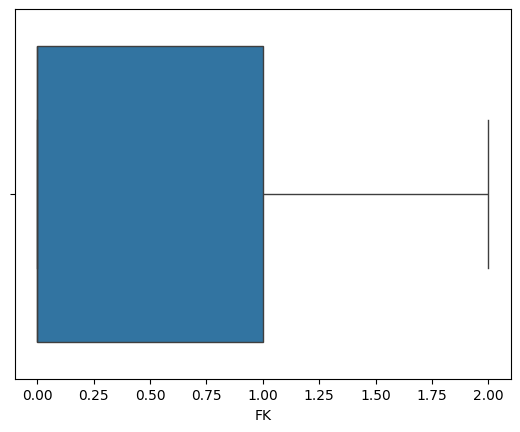

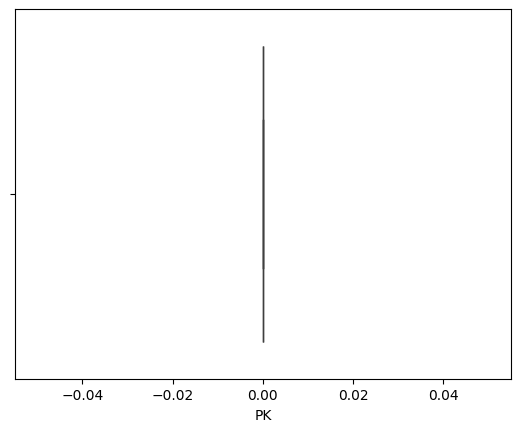

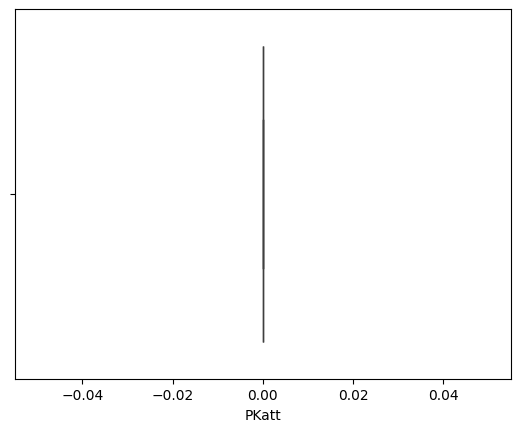

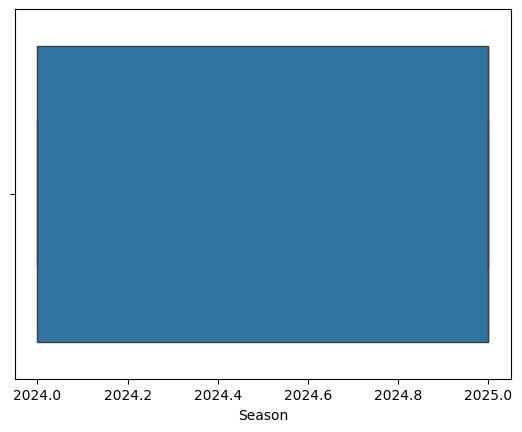

In [15]:
for i in df.select_dtypes(include="number" or "numeric").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [16]:
encoder=LabelEncoder()
category=df.select_dtypes(include=["object","category"])
for x in category:
    df[x]=encoder.fit_transform(df[x])
df.head()

,Date,Time,Team,Round,Day,Result,GF,GA,Opponent,xG,...,Formation,Opp Formation,Referee,Sh,SoT,Dist,FK,PK,PKatt,Season
0,2024-08-17,0,11,0,2,2,2.0,0.0,9,2.6,...,4,4,18,18.0,5.0,14.8,0.0,0.0,0.0,2025
1,2024-08-25,5,11,1,3,2,2.0,0.0,3,2.5,...,4,7,17,19.0,8.0,13.6,1.0,0.0,0.0,2025
2,2024-09-01,4,11,2,3,2,3.0,0.0,13,1.8,...,4,4,1,11.0,3.0,13.4,0.0,0.0,0.0,2025
3,2024-09-14,3,11,3,2,1,0.0,1.0,15,0.9,...,4,4,11,14.0,5.0,14.9,0.0,0.0,0.0,2025
4,2024-09-21,3,11,4,2,2,3.0,0.0,2,2.0,...,4,4,19,19.0,10.5,16.6,0.0,0.0,0.0,2025


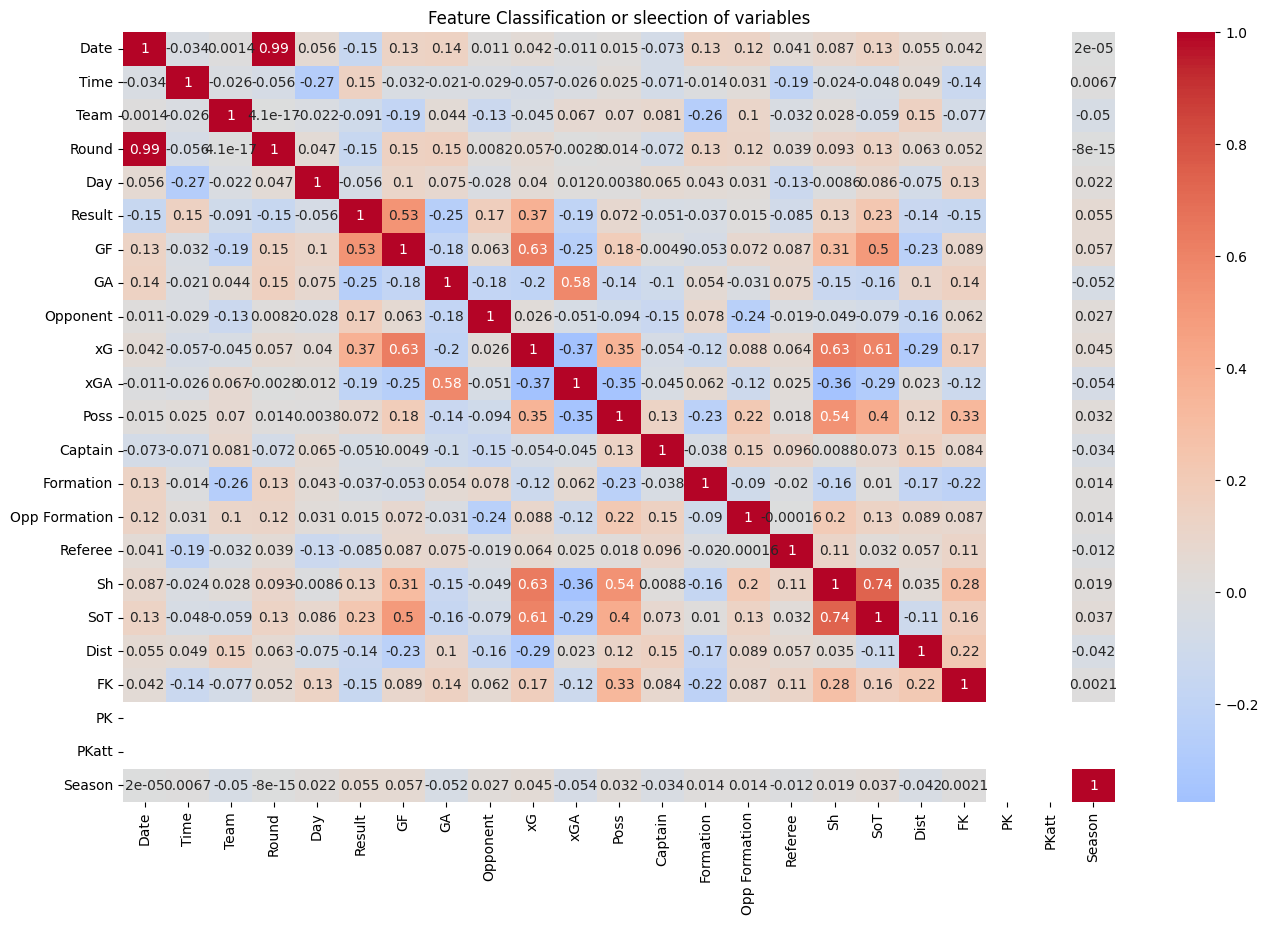

Unique features with Correlation Above 0.5:{'SoT', 'xG', 'xGA', 'GF', 'Poss', 'Sh', 'Date', 'Result', 'Round', 'GA'}


In [17]:
corr_matrix=df.corr()

##plot the heatmap
plt.rcParams["figure.figsize"]=[16,10]
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm",center=0)
plt.title("Feature Classification or sleection of variables")
plt.show()

threshold=0.5

## identify the pairs of features with correlation above the threshold
high_corr_feat=[(feature,other_feature)
               for feature in corr_matrix.columns
               for other_feature in corr_matrix.columns
               if feature != other_feature and abs(corr_matrix.loc[feature,other_feature]) > threshold]
high_corr_set=set([item for sublist in high_corr_feat for item in sublist])
print(f"Unique features with Correlation Above {threshold}:{high_corr_set}")

In [18]:
df2=df[['Round', 'Poss', 'Result', 'GA', 'xG', 'SoT', 'xGA', 'Sh', 'GF']]
df2.head()

,Round,Poss,Result,GA,xG,SoT,xGA,Sh,GF
0,0,62.0,2,0.0,2.6,5.0,0.5,18.0,2.0
1,1,62.0,2,0.0,2.5,8.0,0.5,19.0,2.0
2,2,47.0,2,0.0,1.8,3.0,1.4,11.0,3.0
3,3,68.0,1,1.0,0.9,5.0,0.4,14.0,0.0
4,4,58.0,2,0.0,2.0,10.5,1.1,19.0,3.0


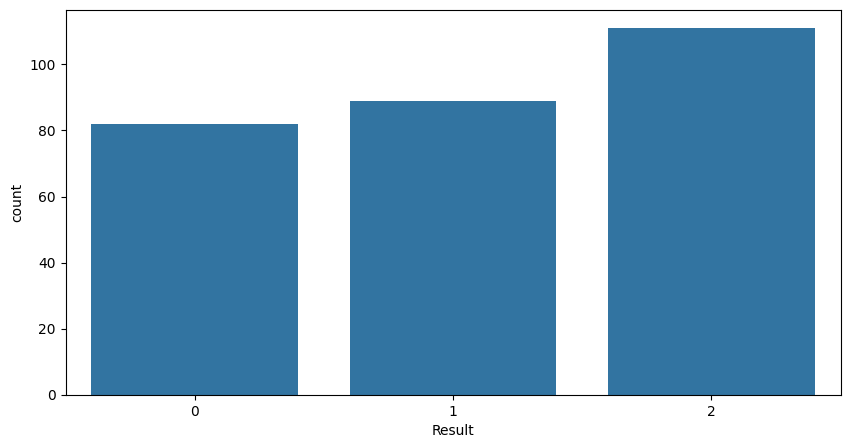

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x="Result",data=df2)
plt.show()

In [20]:
from sklearn.utils import resample

df_0=df2[df2["Result"]==0]
df_1=df2[df2["Result"]==1]
df_2=df2[df2["Result"]==2]

df0_sam=resample(df_0,n_samples=110)
df1_sam=resample(df_1,n_samples=110)
df2_sam=resample(df_2,n_samples=110)

df2=pd.concat([df0_sam,df1_sam,df2_sam])
df2=df2.sample(frac=1,ignore_index=True)

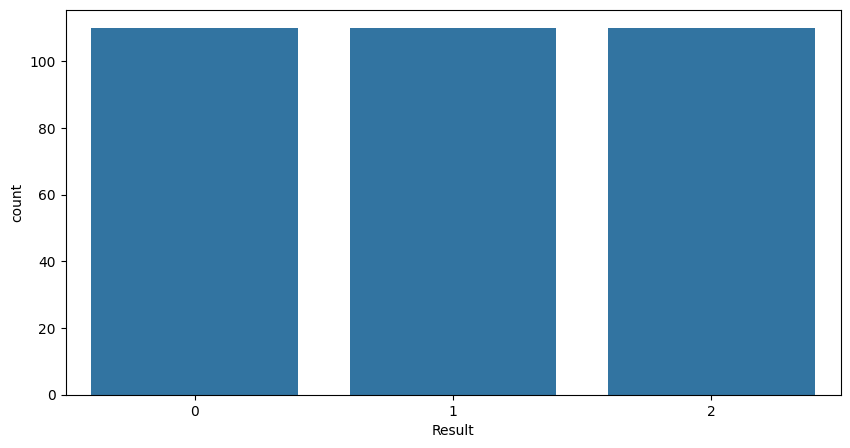

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x="Result",data=df2)
plt.show()

In [38]:
# Assuming df2 is the DataFrame containing the data

# # Step 2: Feature Engineering
# df2['xG_diff'] = df2['xG'] - df2['xGA']
# df2['shot_conversion_rate'] = df2['SoT'] / df2['Sh']

# Step 3: Model Selection and Training
X2 = df2.drop(['Result', 'GF', 'GA'], axis=1)  # Features
y_result = df2[['Result']]  # Target for Result
y_scores = df2[['GF', 'GA']]  # Target for match scores

X_train, X_test, y_train_result, y_test_result = train_test_split(X2, y_result, test_size=0.2, random_state=42)
X_train_scores, X_test_scores, y_train_scores, y_test_scores = train_test_split(X2, y_scores, test_size=0.2, random_state=42)

# Classification model for Result
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train_result)

# Regression model for match scores
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train_scores, y_train_scores)

# Step 4: Model Evaluation and Hyperparameter Tuning
y_pred_result = rfc.predict(X_test)
y_pred_scores = rfr.predict(X_test_scores)

print("Result Classification Metrics:")
print("Accuracy:", accuracy_score(y_test_result, y_pred_result))
print("F1-score:", f1_score(y_test_result, y_pred_result, average='macro'))

print("Match Scores Regression Metrics:")
print("MSE:", mean_squared_error(y_test_scores, y_pred_scores))
print("MAE:", mean_absolute_error(y_test_scores, y_pred_scores))

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Result Classification Metrics:
Accuracy: 0.9696969696969697
F1-score: 0.9700506585612968
Match Scores Regression Metrics:
MSE: 0.14128958333333333
MAE: 0.19965909090909092


In [23]:
print("Feature importance:")
print(rfc.feature_importances_)

Feature importance:
[0.11588489 0.16497331 0.21349942 0.14131435 0.21913979 0.14518823]


In [31]:
import pickle
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Load the model
with open('result-scores2.pkl', 'rb') as file:
    rfc, rfr = pickle.load(file)

# Assuming you have your features (X2) and target variables (y_result and y_scores) defined
X_train, X_test, y_train_result, y_test_result = train_test_split(X2, y_result, test_size=0.2, random_state=42)
X_train_scores, X_test_scores, y_train_scores, y_test_scores = train_test_split(X2, y_scores, test_size=0.2, random_state=42)

# Evaluate the result classifier
y_pred_result = rfc.predict(X_test)

# Print evaluation metrics for the result classifier
print("Confusion Matrix for Result Prediction:")
print(confusion_matrix(y_test_result, y_pred_result))
print("\nClassification Report for Result Prediction:")
print(classification_report(y_test_result, y_pred_result))

# Evaluate the score regressor
y_pred_scores = rfr.predict(X_test_scores)

# If y_test_scores is continuous (regression), you might want to evaluate differently
# For regression, you can use metrics like mean squared error or R-squared
from sklearn.metrics import mean_squared_error, r2_score

# Print evaluation metrics for the score regressor
print("\nMean Squared Error for Score Prediction:")
print(mean_squared_error(y_test_scores, y_pred_scores))
print("\nR-squared for Score Prediction:")
print(r2_score(y_test_scores, y_pred_scores))

Confusion Matrix for Result Prediction:
[[23  0  0]
 [ 1 24  0]
 [ 0  1 17]]

Classification Report for Result Prediction:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       0.96      0.96      0.96        25
           2       1.00      0.94      0.97        18

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66


Mean Squared Error for Score Prediction:
0.14128958333333333

R-squared for Score Prediction:
0.8548974384486343


# MODEL FOR RESULTS(W,L,D)

In [25]:
x=df2.drop(["Result"],axis=1)
y=df2[["Result"]]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=1)
from sklearn.pipeline import Pipeline
log=Pipeline([("Scaler",StandardScaler()),("Regression",LogisticRegression())])
des=Pipeline([("Scaler",StandardScaler()),("Regression",DecisionTreeClassifier())])
forest=Pipeline([("Scaler",StandardScaler()),("Regression",RandomForestClassifier())])
forest.fit(xtrain,ytrain)
pred1=forest.predict(xtest)
print(classification_report(ytest,pred1))

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       1.00      0.92      0.96        24
           1       0.92      1.00      0.96        24
           2       1.00      1.00      1.00        18

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66



# MODEL FOR SCORES(GF,GA)

In [26]:
# Preprocess the data
X = df2.drop(['GF', 'GA',], axis=1)  # features
y_home = df2['GF']  # target variable for home score
y_away = df2['GA']  # target variable for away score

# Split the data into training and testing sets
X_train, X_test, y_train_home, y_test_home = train_test_split(X, y_home, test_size=0.2, random_state=42)
X_train, X_test, y_train_away, y_test_away = train_test_split(X, y_away, test_size=0.2, random_state=42)

rfr_home = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_home.fit(X_train, y_train_home)

rfr_away = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_away.fit(X_train, y_train_away)
# Evaluate the models
y_pred_home = rfr_home.predict(X_test)
y_pred_away = rfr_away.predict(X_test)

print('Home Score MSE:', mean_squared_error(y_test_home, y_pred_home))
print('Home Score MAE:', mean_absolute_error(y_test_home, y_pred_home))
print('Home Score R2:', r2_score(y_test_home, y_pred_home))
print('Away Score MSE:', mean_squared_error(y_test_away, y_pred_away))
print('Away Score MAE:', mean_absolute_error(y_test_away, y_pred_away))
print('Away Score R2:', r2_score(y_test_away, y_pred_away))

Home Score MSE: 0.13407992424242424
Home Score MAE: 0.17310606060606062
Home Score R2: 0.8707920690227311
Away Score MSE: 0.056767045454545445
Away Score MAE: 0.14265151515151514
Away Score R2: 0.935386137967076


# MODEL FOR BOTH RESULTS(W,L,D) & SCORES(GA,GA)

In [27]:
# # Preprocess the data
# X1 = df2.drop(['Result', 'GF', 'GA'], axis=1)  # features
# y_outcome = df2['Result']  # target variable for match outcome
# y_home1 = df2['GF']  # target variable for home score
# y_away1 = df2['GA']  # target variable for away score

# # Split the data into training and testing sets
# X_train1, X_test1, y_train_outcome, y_test_outcome = train_test_split(X1, y_outcome, test_size=0.2, random_state=42)
# X_train1, X_test1, y_train_home1, y_test_home1 = train_test_split(X1, y_home1, test_size=0.2, random_state=42)
# X_train1, X_test1, y_train_away1, y_test_away1 = train_test_split(X1, y_away1, test_size=0.2, random_state=42)

# # Train a logistic regression model for match outcome
# #log_reg = LogisticRegression(random_state=42)
# forest1=Pipeline([("Scaler",StandardScaler()),("Regression",RandomForestClassifier())])
# forest1.fit(X_train1, y_train_outcome)

# # Train a linear regression model for home score
# #lin_reg_home = LinearRegression()
# rfc_home1 = RandomForestRegressor(n_estimators=100, random_state=42)
# rfc_home1.fit(X_train1, y_train_home1)

# # Train a linear regression model for away score
# #lin_reg_away = LinearRegression()
# rfc_away1 = RandomForestRegressor(n_estimators=100, random_state=42)
# rfc_away1.fit(X_train1, y_train_away1)

# # Combine the models
# y_pred_outcome = forest1.predict(X_test1)
# y_pred_home1 = rfc_home1.predict(X_test1)
# y_pred_away1 = rfc_away1.predict(X_test1)

# # Evaluate the models
# print('Match Outcome Accuracy:', accuracy_score(y_test_outcome, y_pred_outcome))
# print('Home Score MSE:', mean_squared_error(y_test_home1, y_pred_home1))
# print('Away Score MSE:', mean_squared_error(y_test_away1, y_pred_away1))
# print('Home Score R2:', r2_score(y_test_home1, y_pred_home1))
# print('Away Score R2:', r2_score(y_test_away1, y_pred_away1))

In [28]:
# cm=confusion_matrix(ytest,pred1)
# sns.heatmap(cm,annot=True,fmt="0.9g")

In [39]:
import pickle

with open('result-scores2.pkl', 'wb') as file:
    pickle.dump((rfc,rfr), file)

In [30]:
# # Define the feature names (adjust these based on your actual model features)
# feature_names = ['Formation', 'Referee', 'Sh', 'SoT', 'Dist', 'FK', 'PK', 'PKatt']


# # Input fields for other features
# formation = st.selectbox('Formation', ['4-4-2', '4-3-3', '3-5-2'])  # Add more formations as needed
# referee = st.text_input('Referee Name')
# shots = st.number_input('Expected Shots', min_value=0)
# shots_on_target = st.number_input('Expected Shots on Target', min_value=0)
# distance = st.number_input('Average Shot Distance', min_value=0.0)
# free_kicks = st.number_input('Expected Free Kicks', min_value=0)
# penalties = st.number_input('Expected Penalties', min_value=0)
# penalty_attempts = st.number_input('Expected Penalty Attempts', min_value=0)

# # Prediction button
# if st.button('Predict Score'):
#     # Prepare the input data
#     input_data = np.array([formation, referee, shots, shots_on_target, distance, 
#                            free_kicks, penalties, penalty_attempts]).reshape(1, -1)
    


# # Add some information about the model and its usage
# st.sidebar.header('About')
# st.sidebar.info('This app uses a machine learning model to predict the score of a football match based on various features. Please note that predictions are estimates and many factors can influence the actual outcome of a match.')

# # Confusion matrix visualization
# if st.button("Show Confusion Matrix"):
#     # Assuming y_test and y_pred exist from previous runs (adjust accordingly)
#     cm = confusion_matrix(y_test, y_pred)
#     sns.heatmap(cm, annot=True, fmt="d")
#     plt.title("Confusion Matrix")
#     st.pyplot(plt.gcf())


# # - A named CSS color:
#             # aliceblue, antiquewhite, aqua, aquamarine, azure,
#             # beige, bisque, black, blanchedalmond, blue,
#             # blueviolet, brown, burlywood, cadetblue,
#             # chartreuse, chocolate, coral, cornflowerblue,
#             # cornsilk, crimson, cyan, darkblue, darkcyan,
#             # darkgoldenrod, darkgray, darkgrey, darkgreen,
#             # darkkhaki, darkmagenta, darkolivegreen, darkorange,
#             # darkorchid, darkred, darksalmon, darkseagreen,
#             # darkslateblue, darkslategray, darkslategrey,
#             # darkturquoise, darkviolet, deeppink, deepskyblue,
#             # dimgray, dimgrey, dodgerblue, firebrick,
#             # floralwhite, forestgreen, fuchsia, gainsboro,
#             # ghostwhite, gold, goldenrod, gray, grey, green,
#             # greenyellow, honeydew, hotpink, indianred, indigo,
#             # ivory, khaki, lavender, lavenderblush, lawngreen,
#             # lemonchiffon, lightblue, lightcoral, lightcyan,
#             # lightgoldenrodyellow, lightgray, lightgrey,
#             # lightgreen, lightpink, lightsalmon, lightseagreen,
#             # lightskyblue, lightslategray, lightslategrey,
#             # lightsteelblue, lightyellow, lime, limegreen,
#             # linen, magenta, maroon, mediumaquamarine,
#             # mediumblue, mediumorchid, mediumpurple,
#             # mediumseagreen, mediumslateblue, mediumspringgreen,
#             # mediumturquoise, mediumvioletred, midnightblue,
#             # mintcream, mistyrose, moccasin, navajowhite, navy,
#             # oldlace, olive, olivedrab, orange, orangered,
#             # orchid, palegoldenrod, palegreen, paleturquoise,
#             # palevioletred, papayawhip, peachpuff, peru, pink,
#             # plum, powderblue, purple, red, rosybrown,
#             # royalblue, rebeccapurple, saddlebrown, salmon,
#             # sandybrown, seagreen, seashell, sienna, silver,
#             # skyblue, slateblue, slategray, slategrey, snow,
#             # springgreen, steelblue, tan, teal, thistle, tomato,
#             # turquoise, violet, wheat, white, whitesmoke,
#             # yellow, yellowgreen

    # # Team selection
    # selected_teams = st.multiselect(
    #     "Select Teams",
    #     options=df['Team'].unique(),
    #     default=df['Team'].unique()[:5]  # Default to first 5 teams
    # )

    # Display raw data
    # if st.checkbox("Show Raw Data"):
    #     st.write(filtered_df)